Desafío - Tabaquismo y gestación
1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.

In [78]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

df = pd.read_csv("baby.csv")
df.head(20)


,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False
5,6,138,244,33,62,178,False
6,7,132,245,23,65,140,False
7,8,120,289,25,62,125,False
8,9,143,299,30,66,136,True
9,10,140,351,27,68,120,False


2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? Justifica tu respuesta creando los gráficos y modelos necesarios.

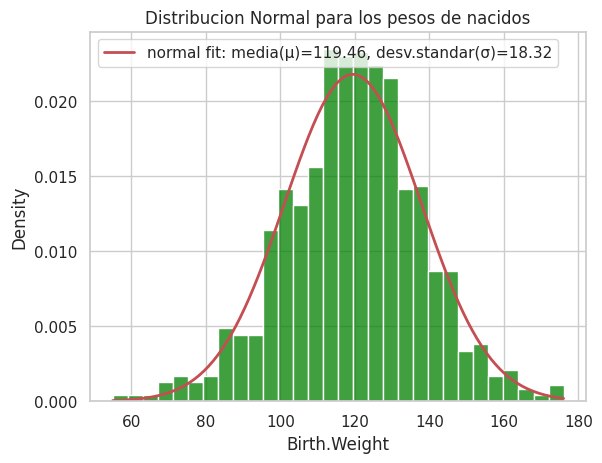

In [79]:
PesoBebes = df["Birth.Weight"].dropna()
#ajuste de los datospara el modelo
mu, std = norm.fit(PesoBebes)
xmin, xmax = PesoBebes.min(), PesoBebes.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

sns.set_theme(style="whitegrid")
sns.histplot(PesoBebes, color="green", bins=30, stat="density")
plt.plot(x, p, 'r', linewidth=2, label=f'normal fit: media(μ)={mu:.2f}, desv.standar(σ)={std:.2f}')
plt.title("Distribucion Normal para los pesos de nacidos")
plt.legend(loc="upper left")
plt.show()


R/. Si, los datos siguen un modelo de distribucion normal para la categoria de pesos por bebes.

3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales.

In [80]:
def modelo_distri (dato):
    pdf = norm.pdf(dato, loc=mu, scale=std).round(4)
    cdf = norm.cdf(dato, loc=mu, scale=std).round(4)
    print(f"* PARA PESO DE {dato}oz:\nDensidad de la Probabilidad = {pdf} \nDistribuciion Acumulada = {cdf} \n-------------------------------------")

#EVALUACION PARA 5 VALORES (PESOS)
modelo_distri(92)
modelo_distri(120)
modelo_distri(128)
modelo_distri(136)
modelo_distri(144)

* PARA PESO DE 92oz:
Densidad de la Probabilidad = 0.0071 
Distribuciion Acumulada = 0.0669 
-------------------------------------
* PARA PESO DE 120oz:
Densidad de la Probabilidad = 0.0218 
Distribuciion Acumulada = 0.5117 
-------------------------------------
* PARA PESO DE 128oz:
Densidad de la Probabilidad = 0.0195 
Distribuciion Acumulada = 0.6794 
-------------------------------------
* PARA PESO DE 136oz:
Densidad de la Probabilidad = 0.0145 
Distribuciion Acumulada = 0.8166 
-------------------------------------
* PARA PESO DE 144oz:
Densidad de la Probabilidad = 0.0089 
Distribuciion Acumulada = 0.9098 
-------------------------------------


R./ Observando la distribucion normal, coincide con los datos reales pues cuando es calculado la densidad de la probabilidad el punto queda en la linea de la grafica.Con respecto a la distribucion acumulada da con mayor de probabilidad de ser menor al dato el peso de 144oz osea que entre mas grande sea las onzas mas probable sea que el dato ente en el estudio o sea seleccionado.

4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? Explica y construye los modelos correspondientes.

In [81]:
# se separan los datos de las mujeres fumadoras y no fumadores

MFum = df[df["Maternal.Smoker"] == True]
MFumc = MFum["Birth.Weight"].dropna()
MNFum = df[df["Maternal.Smoker"] == False]
MNFumc = MNFum["Birth.Weight"].dropna()


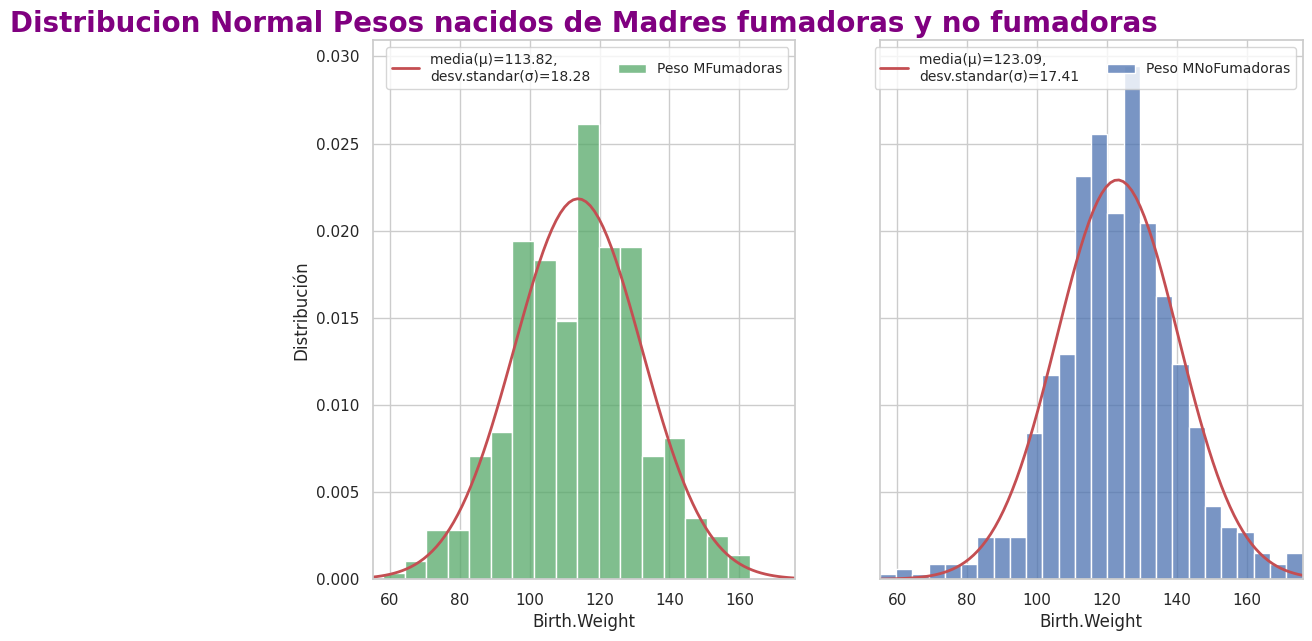

* PARA PESO DE 123oz Madres Fumadoras:
Densidad de la Probabilidad = 0.0192 
Distribucion Acumulada = 0.6923 
-------------------------------------
* PARA PESO DE 123oz Madres NO Fumadoras:
Densidad de la Probabilidad = 0.0214 
Distribucion Acumulada = 0.5766 
-------------------------------------


In [82]:
#se importa tema
sns.set_theme(style="whitegrid")

#Se grafica
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))

#ajuste de los datos para el modelo para madres fumadoras
muf, stdf = norm.fit(MFumc)
xminFum, xmaxFum = MFumc.min(), MFumc.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, muf, stdf)

sns.histplot(MFumc, ax=ax1, label="Peso MFumadoras", color="g", stat="density")
ax1.plot(x, p, 'r', linewidth=2, label=f'media(μ)={muf:.2f}, \ndesv.standar(σ)={stdf:.2f}')
ax1.legend(loc="upper right")

#ajuste de los datos para el modelo para madres no fumadoras
munf, stdnf = norm.fit(MNFumc)
xminNFum, xmaxNFum = MNFumc.min(), MNFumc.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, munf, stdnf)

sns.histplot(MNFumc, ax=ax2, label="Peso MNoFumadoras", color="b", stat="density")
ax2.plot(x, p, 'r', linewidth=2, label=f'media(μ)={munf:.2f}, \ndesv.standar(σ)={stdnf:.2f}')
ax2.legend(loc="upper left")

# Igualar escala eje X
xmin = min(xminFum, xminNFum)
xmax = max(xmaxFum, xmaxNFum)
ax1.set_xlim(xmin, xmax)
ax2.set_xlim(xmin, xmax)

# Igualar escala eje Y
max_y1 = ax1.get_ylim()[1]
max_y2 = ax2.get_ylim()[1]
max_y = max(max_y1, max_y2)
ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

#etiquetas
ax1.legend(ncol=2, loc="upper right", fontsize=10)
ax2.legend(ncol=2, loc="upper right", fontsize=10)
ax2.set_yticklabels([])
ax2.set_ylabel("")
ax1.set_ylabel("Distribución")
ax1.set_title("Distribucion Normal Pesos nacidos de Madres fumadoras y no fumadoras", fontsize=20, fontweight="bold", color="purple")

plt.show()

#funcion para calculo de la densidad y la distribucion
def modelo_distri(dato):
    pdf = norm.pdf(dato, loc=mu, scale=std).round(4)
    cdf = norm.cdf(dato, loc=mu, scale=std).round(4)
    print(f"* PARA PESO DE {dato}oz Madres NO Fumadoras:\nDensidad de la Probabilidad = {pdf} \nDistribucion Acumulada = {cdf} \n-------------------------------------")

def modelo_distrif(dato):
    pdf = norm.pdf(dato, loc=muf, scale=stdf).round(4)
    cdf = norm.cdf(dato, loc=muf, scale=stdf).round(4)
    print(f"* PARA PESO DE {dato}oz Madres Fumadoras:\nDensidad de la Probabilidad = {pdf} \nDistribucion Acumulada = {cdf} \n-------------------------------------")

#EVALUACION PARA 2 VALORES (PESOS)
modelo_distrif(123)
modelo_distri(123)


R/. Para el peso de los bebes de las madres fumadoras tienen una probabilidad de tener un peso mayor es menor que las de las mujeres que no fuman, cuando se mide la probabilidad para peso promedio en el modelo de las madres fumadoras y se calcula la probabilidad tiende a ser mayor la probabilidad con el mismo peso para las madres no fumadoras que las fumadoras, la distribucion acumulada para el mismo peso es mayor para las no fumadoras, si se quiere igualar y se calcula que pesos en los dos modelos que peso tiene una probabilidad parecidaÑ

In [83]:
modelo_distrif(109.7)
modelo_distri(115.5)

* PARA PESO DE 109.7oz Madres Fumadoras:
Densidad de la Probabilidad = 0.0213 
Distribucion Acumulada = 0.4108 
-------------------------------------
* PARA PESO DE 115.5oz Madres NO Fumadoras:
Densidad de la Probabilidad = 0.0213 
Distribucion Acumulada = 0.4144 
-------------------------------------


Si se trata de encontrar un peso con probabilidad similar, para las mujeres que fuman los bebes nacidos con peso de 109.7oz es la misma probabilidad que para los bebes de mujeres no fumadoras con un peso de 115.5oz, osea que para las mujeres que no fuman tienen una probabilidad de tener bebes con mejor peso que las que fuman.

5. Considerando los datos dados:
    ● Calcula la probabilidad de que una madre escogida al azar fume.

In [84]:
#Calcula la probabilidad de que una madre escogida al azar fume.
#Conteo de variables
MF = df["Maternal.Smoker"].sum()
Total = len(df["Maternal.Smoker"])

#probabilidad de que una madre escogida al azar fume.
PMfu = MF / Total
print(f"Probabilidad de que una madre escogida al azar fume: {PMfu:.2f} > {PMfu*100:.2f}%")


Probabilidad de que una madre escogida al azar fume: 0.39 > 39.10%


 ● A partir del valor anterior, construye un modelo de distribución binomial que modele el experimento correspondiente a escoger 5 madres al azar y observar cuántas fuman.

Para 5 madres escogidas al azar (ensayos):


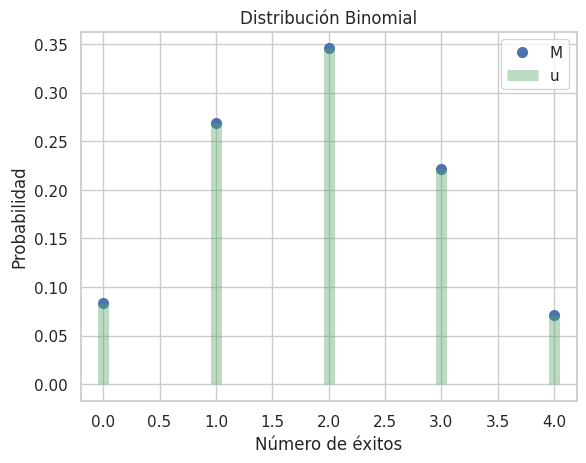

In [93]:
#se importa modulo de binomio
from scipy.stats import binom

#Modelo de distribución binomial, escoger 5 madres al azar y observar cuántas fuman.
n = int(input("Inserta numero de ensayos para distribucion binomial:"))

binomial = binom(n, PMfu)

x = np.arange(binomial.ppf(0.01), binomial.ppf(0.99)+1)

# Función masa de probabilidad (pmf)
pmf = binomial.pmf(x)

#propiedades
print(f"Para {n} madres escogidas al azar (ensayos):")

#generar grafica
plt.plot(x, pmf, 'bo', ms=7, label='pmf')
plt.vlines(x, 0, pmf, colors='g', lw=8, alpha=0.4)
plt.title('Distribución Binomial')
plt.xlabel('Número de éxitos')
plt.ylabel('Probabilidad')
plt.legend(f"Muestras {pmf}")
plt.show()

● Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias muestrales.

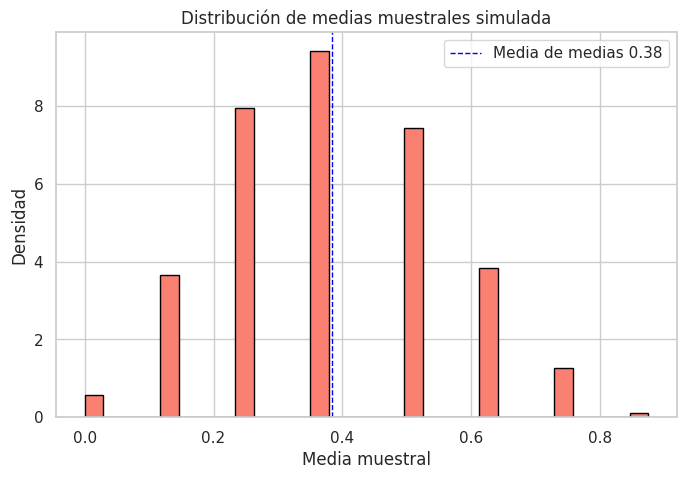

In [86]:
#Modelo de distribución binomial, escoger 5 madres al azar y observar cuántas fuman.
n1 = int(input("Inserta numero de ensayos para medias muestrales (tamaño de la muestra):"))
N_mues = int(input("Inserta numero de muestras:"))

np.random.seed(42)
simuladas = np.random.binomial(n=1, p=PMfu, size=(N_mues, n1))

# Función masa de probabilidad (pmf)
pmf = binomial.pmf(x)


# Obtener las medias muestrales
medias_muestrales = []
for i in range(N_mues):
    muestra = simuladas[i,:]
    medias_muestrales.append(np.mean(muestra))

# Graficar la distribución de las medias muestrales
plt.figure(figsize=(8,5))
plt.hist(medias_muestrales, bins=30, color='salmon', edgecolor='black', density=True)
plt.axvline(np.mean(medias_muestrales), color='blue', linestyle='dashed', linewidth=1, label=f'Media de medias {np.mean(medias_muestrales):.2f}')
plt.title('Distribución de medias muestrales simulada')
plt.xlabel('Media muestral')
plt.ylabel('Densidad')
plt.legend()
plt.show()


● Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula sus respectivas medias muestrales.

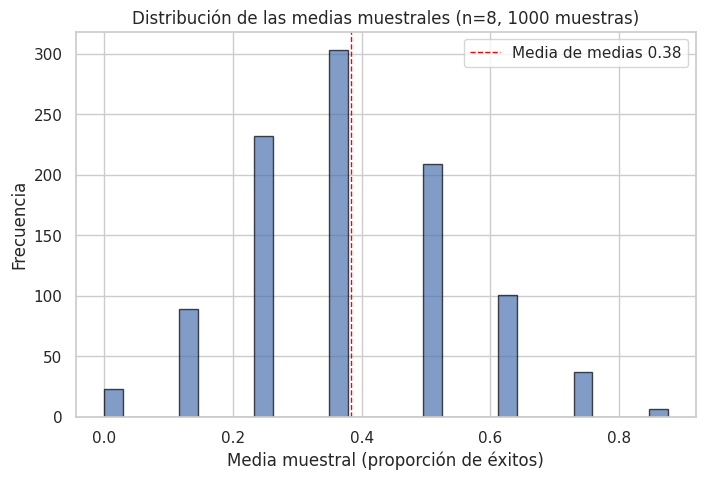

In [87]:
#Modelo de distribución binomial, escoger 5 madres al azar y observar cuántas fuman.
n1 = int(input("Inserta numero de ensayos para medias muestrales:"))
N_mues = int(input("Inserta numero de muestras:"))

muestras = binom.rvs(n1, PMfu, size=N_mues)

# Función masa de probabilidad (pmf)
pmf = binomial.pmf(x)

# Graficar histograma de las medias muestrales
plt.figure(figsize=(8,5))
plt.hist(muestras / n1, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(muestras/n1), color='red', linestyle='dashed', linewidth=1, label=f'Media de medias {np.mean(muestras/n1):.2f}')
plt.title(f'Distribución de las medias muestrales (n={n1}, {N_mues} muestras)')
plt.xlabel('Media muestral (proporción de éxitos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.legend()
plt.show()


- Compara gráficamente los resultados obtenidos anteriormente.

    r./El grafico se presenta en las mismas proporciones graficas, la media de medias son muy similares acercandose a 0.385, lo que representa que el modelo se comporta de manera similar.

- Verifica el teorema del límite central, considerando las muestras de datos reales y las simuladas con el modelo binomial.

    r./En cualquiera de los casos el modelo es parecido graficamente, el promedio de promedios tiende a ser el mismo

- Construye un modelo de distribución normal derivado del modelo binomial, y grafícalo junto a los anteriores para comparar. Concluye.

Para 6 madres fumadoras escogidas al azar - ENSAYOS
Para 3000 MUESTRAS para simulacion


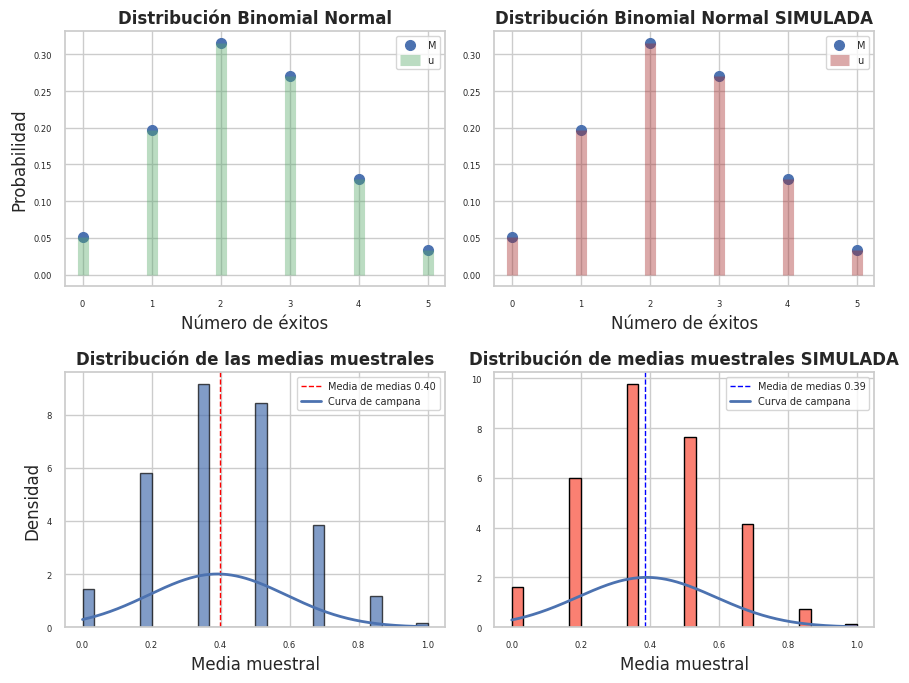

In [133]:
#se importa modulo de binomio
from scipy.stats import binom

#se importa tema
sns.set_theme(style="whitegrid")

#Se crea tablero de grafica
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 7))

#Modelo de distribución binomial, escoger 5 madres al azar y observar cuántas fuman.
n = int(input("Inserta numero de ensayos para distribucion binomial:"))
binomial = binom(n, PMfu)

x = np.arange(binomial.ppf(0.01), binomial.ppf(0.99)+1)

# Función masa de probabilidad (pmf)
pmf = binomial.pmf(x)

#generar grafica
ax1.plot(x, pmf, 'bo', ms=7, label='pmf')
ax1.vlines(x, 0, pmf, colors='g', lw=8, alpha=0.4)
ax1.tick_params(axis='both', labelsize=6, labelrotation=0)
ax1.set_title('Distribución Binomial Normal', fontweight='bold')
ax1.set_xlabel('Número de éxitos')
ax1.set_ylabel('Probabilidad')
ax1.legend(f"Muestras {pmf}", fontsize=7)
plt.tight_layout()

#----------------------

#Modelo de distribución binomial, random.
dist_binomial = binom(n=n, p=PMfu)
binomial_ramd = np.random.binomial(n, PMfu, size=N_mues)

x = np.arange(dist_binomial.ppf(0.01), dist_binomial.ppf(0.99)+1)

# Función masa de probabilidad (pmf)
pmf1 = dist_binomial.pmf(x)

#generar grafica
ax2.plot(x, pmf, 'bo', ms=7, label='pmf')
ax2.vlines(x, 0, pmf, colors='brown', lw=8, alpha=0.4)
ax2.tick_params(axis='both', labelsize=6, labelrotation=0)
ax2.set_title('Distribución Binomial Normal SIMULADA', fontweight='bold')
ax2.set_xlabel('Número de éxitos')
ax2.legend(f"Muestras {pmf1}", fontsize=7)
plt.tight_layout()

#================================

#Modelo de distribución binomial, escoger 5 madres al azar y observar cuántas fuman.
N_mues = int(input("Inserta numero de muestras para simulacion:"))

print(f"=====================================================\nPara {n} madres fumadoras escogidas al azar - ENSAYOS\nPara {N_mues} MUESTRAS para simulacion\n=====================================================")

muestras = binom.rvs(n, PMfu, size=N_mues)

# Función masa de probabilidad (pmf)
pmf = binomial.pmf(x)


# Histogramas y curva normal para muestras / n (medias muestrales)
muestras = binom.rvs(n, PMfu, size=N_mues)
medias_muestrales = muestras / n

ax3.hist(medias_muestrales, bins=30, edgecolor='black', alpha=0.7, density=True)
ax3.axvline(np.mean(medias_muestrales), color='red', linestyle='dashed', linewidth=1, label=f'Media de medias {np.mean(medias_muestrales):.2f}')

# Parámetros para la campana normal (TCL)
mu = PMfu
sigma = np.sqrt(PMfu * (1 - PMfu) / n)
x_norm = np.linspace(min(medias_muestrales), max(medias_muestrales), 1000)
ax3.plot(x_norm, norm.pdf(x_norm, mu, sigma), 'b-', lw=2, label='Curva de campana')
ax3.tick_params(axis='both', labelsize=6)
ax3.set_title('Distribución de las medias muestrales', fontweight='bold')
ax3.set_xlabel('Media muestral')
ax3.set_ylabel('Densidad')
ax3.grid(True)
ax3.legend(fontsize=7)

# Simulación medias muestrales con ensayos individuales
np.random.seed(42)
simuladas = np.random.binomial(n=1, p=PMfu, size=(N_mues, n))
medias_muestrales_sim = [np.mean(simuladas[i, :]) for i in range(N_mues)]

ax4.hist(medias_muestrales_sim, bins=30, color='salmon', edgecolor='black', density=True)
ax4.axvline(np.mean(medias_muestrales_sim), color='blue', linestyle='dashed', linewidth=1, label=f'Media de medias {np.mean(medias_muestrales_sim):.2f}')

# Curva normal para simuladas
mu_sim = PMfu
sigma_sim = np.sqrt(PMfu * (1 - PMfu) / n)
x_norm_sim = np.linspace(min(medias_muestrales_sim), max(medias_muestrales_sim), 1000)
ax4.plot(x_norm_sim, norm.pdf(x_norm_sim, mu_sim, sigma_sim), 'b-', lw=2, label='Curva de campana')
ax4.tick_params(axis='both', labelsize=6)
ax4.set_title('Distribución de medias muestrales SIMULADA', fontweight='bold')
ax4.set_xlabel('Media muestral')
ax4.legend(fontsize=7)

plt.tight_layout()
plt.show()

R./ La tendencia de los graficos es la misma, la proporcion se conserva explicando una tendencia, en el caso de la media muestral entre mas muestas existan mas tiende a ser igual la media de las medias osea a 0.39, los estudios se acercan mas a la realidad si se toma mayor cantidad de datos para encontrar la probabilidad.